# Correlation between Categorical Features
* In categorical features , correlation is called as association
* So we need to find the association between two categorical features

#  Cramér’s V

* It is based on a Pearson’s Chi-Square Test.
* Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. 
* There are no negative values, as there’s no such thing as a negative association.

In [59]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Pandas version: 1.3.0

In [60]:
tips_data=pd.read_csv(r"D:\Kaggle\StudentsPerformance.csv")

In [61]:
tips_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [62]:
tips_data.shape

(1000, 8)

In [63]:
tips_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Filtering categorical Features

In [64]:
tips_categorical=tips_data[['gender','race/ethnicity','parental level of education','lunch']]

In [65]:
tips_categorical.head()

,gender,race/ethnicity,parental level of education,lunch
0,female,group B,bachelor's degree,standard
1,female,group C,some college,standard
2,female,group B,master's degree,standard
3,male,group A,associate's degree,free/reduced
4,male,group C,some college,standard


# Building of the Cramer's V function

In [66]:

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

# Building of the matrix

In [67]:
rows= []

for var1 in tips_categorical:
  col = []
  for var2 in tips_categorical :
    cramers =cramers_V(tips_categorical[var1], tips_categorical[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = tips_categorical.columns, index =tips_categorical.columns)

In [68]:
df

,gender,race/ethnicity,parental level of education,lunch
gender,1.00,0.01,0.00,0.0
race/ethnicity,0.01,1.00,0.01,0.0
parental level of education,0.00,0.01,1.00,0.0
lunch,0.00,0.00,0.00,1.0


# Creating heatMap

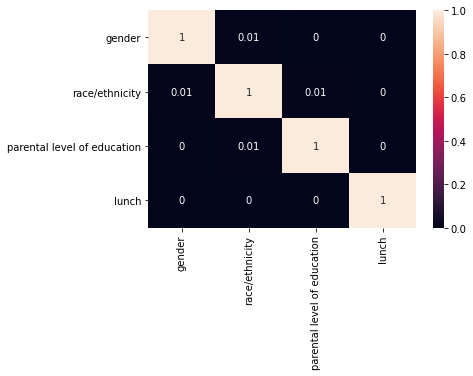

In [69]:
# generating 2-D 10x10 matrix of random numbers
# from 1 to 100
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
  
# setting the parameter values
annot = True
  
# plotting the heatmap
hm = sns.heatmap(data=df,
                annot=annot)
  
# displaying the plotted heatmap
plt.show()

In [46]:

# mask = np.zeros_like(df, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = False

# with sns.axes_style("white"):
#   ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

# plt.show()

In [41]:
# tips.head()

In [23]:
# def cramers_v(confusion_matrix):
#     """ calculate Cramers V statistic for categorial-categorial association.
#         uses correction from Bergsma and Wicher,
#         Journal of the Korean Statistical Society 42 (2013): 323-328
#     """
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum()
#     phi2 = chi2 / n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
#     rcorr = r - ((r-1)**2)/(n-1)
#     kcorr = k - ((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [24]:
# confusion_matrix = pd.crosstab(tips["day"], tips["time"])

In [25]:
# cramers_v(confusion_matrix.values)

In [26]:
# confusion_matrix = pd.crosstab(tips["total_bill_cut"], tips["time"])
# cramers_v(confusion_matrix.values)